자료

https://gaussian37.github.io/vision-segmentation-deeplabv3/  
https://github.com/rishizek/tensorflow-deeplab-v3-plus/blob/master/deeplab_model.py

내가 가지고 있는 데이터는 semantic segmentation이 어울릴 거 같다  
왜냐하면 데이터가 같은 객체는 하나의 segmentation으로 묶어서 마스크를 했기 때문이다  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 인풋 구조

## image 형식 확인란

In [ ]:
!gdown https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
!unzip -q  instance-level-human-parsing.zip

!ls instance-level_human_parsing/instance-level_human_parsing/Training

Downloading...
From: https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
To: /content/instance-level-human-parsing.zip
100% 2.91G/2.91G [00:37<00:00, 76.7MB/s]
Categories    Human	 Images        Instances
Category_ids  Human_ids  Instance_ids  train_id.txt


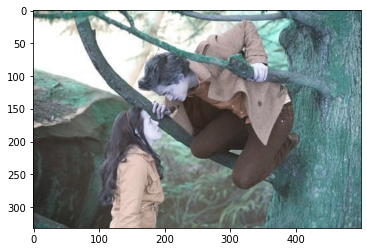

uint8
(332, 500, 3)
[ 13  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255]


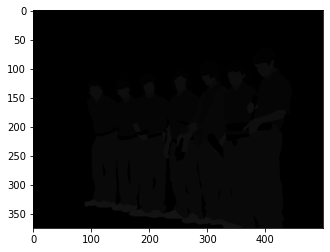

uint8
(375, 500, 3)
[ 0  1  2  5  7  9 10 13 14 15 18 19]


In [ ]:
import cv2
from glob import glob
import matplotlib.pyplot as plt

dummy_img_path = glob('/content/instance-level_human_parsing/instance-level_human_parsing/Training/Images/*')
dummy_msk_path = glob('/content/instance-level_human_parsing/instance-level_human_parsing/Training/Category_ids/*')

dummy_img = cv2.imread(dummy_img_path[0])

plt.imshow(dummy_img)
plt.show()
print(dummy_img.dtype)
print(dummy_img.shape)
print(np.unique(dummy_img))

dummy_msk = cv2.imread(dummy_msk_path[1])

plt.imshow(dummy_msk)
plt.show()
print(dummy_msk.dtype)
print(dummy_msk.shape)
print(np.unique(dummy_msk))

## cv 이미지 편집 기능 확인

In [ ]:
from glob import glob

cv_check_img = [k for k in sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/A/train/images/*')) if not 'augmented' in k]
cv_check_mskd = [k for k in sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/A/train/masks/*')) if not 'augmented' in k]
cv_check_msks = [k for k in sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/B/train/masks/*')) if not 'augmented' in k]

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

nn = 200

img1 = cv2.imread(cv_check_img[nn])
msk1 = cv2.imread(cv_check_mskd[nn])
msk2 = cv2.imread(cv_check_msks[nn])

plt.imshow(img1)
plt.show()

plt.imshow(msk1)
plt.show()
plt.imshow(msk2)
plt.show()


plt.imshow(cv2.subtract(msk1,msk2))
plt.show()
plt.imshow(cv2.subtract(msk2,msk1))
plt.show()

cvm = cv2.subtract(msk2,1)
print(np.unique(cvm))
plt.imshow(cvm)
plt.show()

cvm = cv2.subtract(msk2,np.full_like(msk2,100))
print(np.unique(cvm))
plt.imshow(cvm)
plt.show()

## 마스크 중복 추출

In [ ]:
import os

main_path = '/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1'
damage_l = ['A','B','C']
in_dir = ['train','valid','test']

di_l = []

for i in damage_l:
  for k in in_dir:
    di_l.append(os.path.join(main_path,i,k))

print(di_l)

In [ ]:
# Augmented 파일 미포함
from glob import glob

dmg_l = []
dmg_l_m = []

for k in damage_l:
  dmg_img_path = []
  dmg_m_path = []

  for j in [i for i in di_l if k in i]:
    img = [k for k in sorted(glob(os.path.join(j, 'images/*'))) if not 'augmented' in k]
    dmg_img_path.extend(img)
    msk = [k for k in sorted(glob(os.path.join(j, 'masks/*'))) if not 'augmented' in k]
    dmg_m_path.extend(msk)
  dmg_l.append(dmg_img_path)
  dmg_l_m.append(dmg_m_path)

print(dmg_l[0]) # train,test,val 모두를 합친 A 이미지
print(dmg_l[1]) # train,test,val 모두를 합친 B 이미지
print(dmg_l[2]) # train,test,val 모두를 합친 C 이미지

print(dmg_l_m[0]) # train,test,val 모두를 합친 A 마스크
print(dmg_l_m[1]) # train,test,val 모두를 합친 B 마스크
print(dmg_l_m[2]) # train,test,val 모두를 합친 C 마스크

numpy로 이미지 연산하는 방법

https://engineer-mole.tistory.com/239

In [ ]:
# import numpy as np

# a = np.array([[0.5, 1.2, 0.9], [1.1, 0.8, 1.4]])
# b = np.where(a < 1.0, 0.0, a)
# # a 행렬 요소 중 1.0보다 작은 것들은,
# # 0으로 만들어주고 이에 해당하지 않는 것들은 a 원래 요소를 사용한다

# print(a)
# print(b)

In [ ]:
import matplotlib.pyplot as plt
import cv2

A_m = [cv2.imread(i) for i in dmg_l_m[0]]
B_m = [cv2.imread(i) for i in dmg_l_m[1]]

plt.imshow(A_m[200])
plt.show()
plt.imshow(B_m[200])
plt.show()

In [ ]:
import numpy as np
from PIL import Image

A_m_name = dmg_l_m[0]
B_m_name = dmg_l_m[1]


over_m = []

cnt = 0

for i,j in zip(A_m,B_m):
  
  overlap = np.where(i * j >0,255,i * j)
  # im = Image.fromarray(overlap)
  # over_dataset.append(im)
  over_m.append(overlap)

  cnt+=1

In [ ]:
plt.imshow(Image.open(A_m_name[200]))
plt.show()
plt.imshow(Image.open(B_m_name[200]))
plt.show()

plt.imshow(A_m[200])
plt.show()
plt.imshow(B_m[200])
plt.show()

In [ ]:
def deleteallfile(filepath):
  if os.path.exists(filepath):
    for file in os.scandir(filepath):
      os.remove(file.path)
    return 'remove all file'
  else:
    return 'directory not found'

delet_path = ['/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/augmented',
              '/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/test',
              '/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/train',
              '/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/valid']

for i in delet_path:
  deleteallfile(i+'/image')
  deleteallfile(i+'/nimage')
  deleteallfile(i+'/mask')
  deleteallfile(i+'/nmask')


In [ ]:
# 마스크마다 다른 색상 부여

c_train = 0
c_test = 0
c_valid = 0


for i in range(len(A_m)):
  A_ = cv2.subtract(A_m[i],B_m[i])
  B_ = cv2.subtract(B_m[i],A_m[i])
  overlap_ = cv2.multiply(A_m[i],B_m[i])

  A_fulllike = cv2.cvtColor(A_,cv2.COLOR_BGR2GRAY)
  A_fulllike = cv2.threshold(A_fulllike, 127, 1, cv2.THRESH_BINARY)[1]
  
  B_fulllike = cv2.cvtColor(B_,cv2.COLOR_BGR2GRAY)
  B_fulllike = cv2.threshold(B_fulllike, 127, 2, cv2.THRESH_BINARY)[1]

  overlap_fulllike = cv2.cvtColor(overlap_,cv2.COLOR_BGR2GRAY)
  overlap_fulllike = cv2.threshold(overlap_fulllike, 127, 3, cv2.THRESH_BINARY)[1]


  # plt.imshow(A_fulllike)
  # plt.show()
  # plt.imshow(B_fulllike)
  # plt.show()
  # plt.imshow(overlap_fulllike)
  # plt.show()

  all_m = cv2.add(A_fulllike,B_fulllike)
  all_m = cv2.add(all_m,overlap_fulllike)
  all_m = np.where(all_m<=3,all_m,3)
  
  plt.imshow(all_m)
  plt.show()
  print(np.unique(all_m))
  print(all_m.shape)
  print(all_m.dtype)
  print(type(all_m))


  augmented = cv2.add(A_m[i],B_m[i])

  if 'train' in A_m_name[i]:
    if len(np.unique(all_m)) == 1:
      cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/train/nimage{A_m_name[i][93:]}',cv2.imread(dmg_l[0][i]))
      cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/train/nmask{A_m_name[i][93:]}',all_m)
      print('train nm')
      c_train+=1
      continue
    cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/train/image{A_m_name[i][93:]}',cv2.imread(dmg_l[0][i]))
    cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/train/mask{A_m_name[i][93:]}',all_m)
    cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/augmented{A_m_name[i][93:]}',augmented)
    plt.imshow(all_m)
    plt.show()
    c_train+=1
  elif 'test' in dent_m_name[i]:
    if len(np.unique(all_m)) == 1:
      cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/test/nimage{dent_m_name[i][92:]}',cv2.imread(dmg_l[0][i]))
      cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/test/nmask{dent_m_name[i][92:]}',all_m)
      print('test nm')
      c_test+=1
      continue
    cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/test/image{dent_m_name[i][92:]}',cv2.imread(dmg_l[0][i]))
    cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/test/mask{dent_m_name[i][92:]}',all_m)
    cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/augmented{dent_m_name[i][92:]}',augmented)
    plt.imshow(all_m)
    plt.show()
    c_test+=1
  elif 'valid' in dent_m_name[i]:
    if len(np.unique(all_m)) == 1:
      cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/valid/nimage{dent_m_name[i][93:]}',cv2.imread(dmg_l[0][i]))
      cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/valid/nmask{dent_m_name[i][93:]}',augmented)
      print('valid nm')
      c_valid+=1
      continue
    cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/valid/image{dent_m_name[i][93:]}',cv2.imread(dmg_l[0][i]))
    cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/valid/mask{dent_m_name[i][93:]}',all_m)
    cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/augmented{dent_m_name[i][93:]}',augmented)
    plt.imshow(all_m)
    plt.show()
    c_valid+=1

print('done')

In [ ]:
print(c_train)
print(c_test)
print(c_valid)

print(c_train+c_test+c_valid)

1688
209
212
2109


## deeplab v3

# DeepLab 기반 세그멘테이션

* DeepLab V1: [Semantic Image Segmentation with Deep Convolutional Nets and Fully Connected CRFs](https://arxiv.org/abs/1412.7062), ICLR 2015.
  - Atrous convolution은 기존 convolution과 다르게 필터 내부에 빈 공간을 둔 채로 작동
  - 기존 convolution과 동일한 양의 파라미터와 계산량을 유지하면서 field of view (한 픽셀이 볼 수 있는 영역)를 크게 가져갈 수 있음
  - Semantic segmentation에서 일반적으로 높은 성능을 내기 위해서는 convolutional neural network의 마지막에 존재하는 한 픽셀이 입력값에서 어느 크기의 영역을 커버할 수 있는지를 결정하는 receptive field 크기가 중요
  - Atrous convolution을 활용하면 파라미터 수를 늘리지 않으면서도 receptive field를 크게 키울 수 있기 때문에 DeepLab 계열에서는 이를 적극적으로 활용

### 모델 제작

In [ ]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
IMAGE_SIZE = 512
BATCH_SIZE = 4
NUM_CLASSES = 4
DATA_DIR = '/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/overlap'


train_images = sorted(glob(os.path.join(DATA_DIR, 'train/image/*')))
train_masks = sorted(glob(os.path.join(DATA_DIR, 'train/mask/*')))

val_images = sorted(glob(os.path.join(DATA_DIR, 'valid/image/*')))
val_masks = sorted(glob(os.path.join(DATA_DIR, 'valid/mask/*')))

test_images = sorted(glob(os.path.join(DATA_DIR, 'test/image/*')))
test_masks = sorted(glob(os.path.join(DATA_DIR, 'test/mask/*')))

In [ ]:
def read_image(image_path, mask=False):
  image = tf.io.read_file(image_path)
  if mask:
    image = tf.image.decode_png(image,channels=1)
    image.set_shape([None,None,1])
    image = tf.image.resize(images=image,size=[IMAGE_SIZE,IMAGE_SIZE])
  else:
    image = tf.image.decode_png(image,channels=3)
    image.set_shape([None,None,3])
    image = tf.image.resize(images=image,size=[IMAGE_SIZE,IMAGE_SIZE])
    image = image/127.5 -1
  return image


def load_data(image_list,mask_list):
  image = read_image(image_list)
  mask = read_image(mask_list,mask=True)
  return image,mask


def data_generator(image_list,mask_list):
  dataset = tf.data.Dataset.from_tensor_slices((image_list,mask_list))
  dataset = dataset.map(load_data,num_parallel_calls=tf.data.AUTOTUNE)
  dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
  return dataset

In [ ]:
train_dataset = data_generator(train_images,train_masks)
val_dataset = data_generator(val_images,val_masks)

print(train_dataset)
print(val_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>


In [ ]:
def convolution_block(block_input,num_filters=256,kernel_size=3,dilation_rate=1,padding='same',use_bias=False):
  x = layers.Conv2D(num_filters,
                    kernel_size=kernel_size,
                    dilation_rate=dilation_rate,
                    padding='same',
                    use_bias=use_bias,
                    kernel_initializer=keras.initializers.HeNormal())(block_input)
  x = layers.BatchNormalization()(x)
  return tf.nn.relu(x)

def DilatedSpatialPyramidPooling(dspp_input):
  dims = dspp_input.shape
  x = layers.AveragePooling2D(pool_size=(dims[-3],dims[-2]))(dspp_input)
  x = convolution_block(x,kernel_size=1,use_bias=True)
  out_pool = layers.UpSampling2D(size=(dims[-3]//x.shape[1],dims[-2]//x.shape[2]),interpolation='bilinear')(x)
  out_1 = convolution_block(dspp_input,kernel_size=1,dilation_rate=1)
  out_6 = convolution_block(dspp_input,kernel_size=3,dilation_rate=6)
  out_12 = convolution_block(dspp_input,kernel_size=3,dilation_rate=12)
  out_18 = convolution_block(dspp_input,kernel_size=3,dilation_rate=18)

  x = layers.Concatenate(axis=-1)([out_pool,out_1,out_6,out_12,out_18])
  output = convolution_block(x,kernel_size=1)
  return output


* 왜 conv2d의 numfilters 가 256인가?  
논문에서 0.5로 줄일 수 있게 convolution을 하라고 해서

* 왜 0.5인가?  

* 왜 resnet50에서 conv4 block6 2 relu 레이어를 뽑았는가?  
summary를 보면 resnet50 feature 뽑는 레이어 제일 마지막 출력이 conv4 block6 2 relu여서

* 왜 resnet50에서 conv2 block3 2 relu 레이어를 뽑았는가?  

* 왜 padding은 same인가  
이미지 크기를 유지하기 위해  
convolution이 input의 spatial dimension을 보존하도록 함  
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=worb1605&logNo=221266339261  
https://gaussian37.github.io/vision-segmentation-deeplabv3/  

* interpolation을 바꿨는데 왜 성능 차이가 나지 않는가?

* dilation_rate가 어째서 1,6,12,18인가?


In [ ]:
def DeeplabV3(image_size,num_classes):
  model_input = keras.Input(shape=(image_size,image_size,3))
  resnet50 = keras.applications.ResNet50(weights='imagenet',include_top=False,input_tensor=model_input)

  x = resnet50.get_layer('conv4_block6_2_relu').output
  x = DilatedSpatialPyramidPooling(x)
  
  input_a = layers.UpSampling2D(size=(image_size//4//x.shape[1],image_size//4//x.shape[2]),interpolation='bilinear')(x)

  input_b = resnet50.get_layer('conv2_block3_2_relu').output
  input_b = convolution_block(input_b,num_filters=48,kernel_size=1)

  x = layers.Concatenate(axis=-1)([input_a,input_b])
  x = convolution_block(x)
  x = convolution_block(x)
  x = layers.UpSampling2D(size=(image_size // x.shape[1],
                                image_size // x.shape[2]),
                          interpolation='nearest')(x)
  model_output = layers.Conv2D(num_classes,kernel_size=(1,1),padding='same')(x)
  return keras.Model(inputs=model_input, outputs=model_output)

model = DeeplabV3(image_size=IMAGE_SIZE,num_classes=NUM_CLASSES)
model.summary()

In [ ]:
!pip install graphviz
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='pre_model.png')

Output hidden; open in https://colab.research.google.com to view.

### 모델 학습

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=loss,metrics=['accuracy'])
history = model.fit(train_dataset,validation_data=val_dataset,epochs=20)

Epoch 1/20
395/395 [==============================] - 371s 879ms/step - loss: 0.1840 - accuracy: 0.9470 - val_loss: 0.2693 - val_accuracy: 0.9466
Epoch 2/20
395/395 [==============================] - 152s 384ms/step - loss: 0.1463 - accuracy: 0.9561 - val_loss: 0.1868 - val_accuracy: 0.9518
Epoch 3/20
395/395 [==============================] - 151s 382ms/step - loss: 0.1385 - accuracy: 0.9575 - val_loss: 0.1680 - val_accuracy: 0.9551
Epoch 4/20
395/395 [==============================] - 151s 381ms/step - loss: 0.1327 - accuracy: 0.9584 - val_loss: 0.3557 - val_accuracy: 0.9220
Epoch 5/20
395/395 [==============================] - 151s 382ms/step - loss: 0.1276 - accuracy: 0.9593 - val_loss: 0.1477 - val_accuracy: 0.9554
Epoch 6/20
395/395 [==============================] - 151s 383ms/step - loss: 0.1264 - accuracy: 0.9592 - val_loss: 0.1473 - val_accuracy: 0.9567
Epoch 7/20
395/395 [==============================] - 151s 382ms/step - loss: 0.1184 - accuracy: 0.9610 - val_loss: 0.1878 -

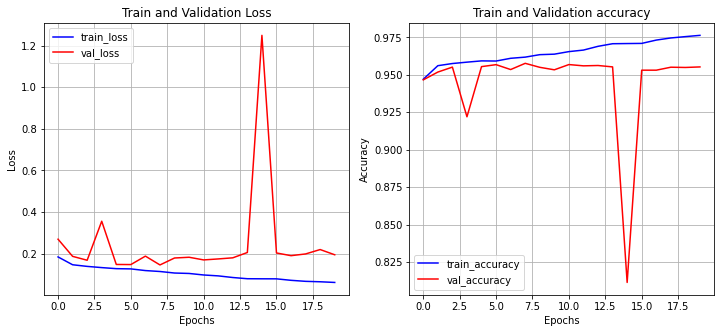

In [ ]:
loss_his = history.history['loss']
val_loss_his = history.history['val_loss']

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(loss_his,color='blue',label='train_loss')
ax1.plot(val_loss_his,color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy_his = history.history['accuracy']
val_accuracy_his = history.history['val_accuracy']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(accuracy_his,color='blue',label='train_accuracy')
ax2.plot(val_accuracy_his,color='red',label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab/portfolio/weight_save/overlap_0604_1')

In [ ]:
def convolution_block(block_input,num_filters=256,kernel_size=3,dilation_rate=1,padding='same',use_bias=False):
  x = layers.Conv2D(num_filters,
                    kernel_size=kernel_size,
                    dilation_rate=dilation_rate,
                    padding='same',
                    use_bias=use_bias,
                    kernel_initializer=keras.initializers.HeNormal())(block_input)
  x = layers.BatchNormalization()(x)
  return tf.nn.relu(x)

def DilatedSpatialPyramidPooling(dspp_input):
  dims = dspp_input.shape
  x = layers.AveragePooling2D(pool_size=(dims[-3],dims[-2]))(dspp_input)
  x = convolution_block(x,kernel_size=1,use_bias=True)
  out_pool = layers.UpSampling2D(size=(dims[-3]//x.shape[1],dims[-2]//x.shape[2]),interpolation='bilinear')(x)
  out_1 = convolution_block(dspp_input,kernel_size=1,dilation_rate=1)
  out_6 = convolution_block(dspp_input,kernel_size=3,dilation_rate=6)
  out_12 = convolution_block(dspp_input,kernel_size=3,dilation_rate=12)
  out_18 = convolution_block(dspp_input,kernel_size=3,dilation_rate=18)

  x = layers.Concatenate(axis=-1)([out_pool,out_1,out_6,out_12,out_18])
  output = convolution_block(x,kernel_size=1)
  return output


In [ ]:
def DeeplabV3(image_size,num_classes):
  model_input = keras.Input(shape=(image_size,image_size,3))
  resnet50 = keras.applications.ResNet50(weights='imagenet',include_top=False,input_tensor=model_input)

  x = resnet50.get_layer('conv4_block6_2_relu').output
  x = DilatedSpatialPyramidPooling(x)
  
  input_a = layers.UpSampling2D(size=(image_size//4//x.shape[1],image_size//4//x.shape[2]),interpolation='bilinear')(x)

  input_b = resnet50.get_layer('conv2_block3_2_relu').output
  input_b = convolution_block(input_b,num_filters=48,kernel_size=1)

  input_c = resnet50.get_layer('conv2_block2_2_relu').output
  input_c = convolution_block(input_b,num_filters=48,kernel_size=1)
  input_d = resnet50.get_layer('conv2_block1_1_relu').output
  input_d = convolution_block(input_b,num_filters=48,kernel_size=3)
  input_e = resnet50.get_layer('conv1_relu').output
  input_e = convolution_block(input_b,num_filters=48,kernel_size=3)
  

  x = layers.Concatenate(axis=-1)([input_a,input_b,input_c,input_d])
  x = convolution_block(x)
  x = convolution_block(x)
  x = layers.UpSampling2D(size=(image_size // x.shape[1],
                                image_size // x.shape[2]),
                          interpolation='nearest')(x)
  model_output = layers.Conv2D(num_classes,kernel_size=(1,1),padding='same')(x)
  return keras.Model(inputs=model_input, outputs=model_output)

model = DeeplabV3(image_size=IMAGE_SIZE,num_classes=NUM_CLASSES)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Epoch 1/7
395/395 [==============================] - 168s 412ms/step - loss: 0.1816 - accuracy: 0.9466 - val_loss: 0.2876 - val_accuracy: 0.9381
Epoch 2/7
395/395 [==============================] - 161s 408ms/step - loss: 0.1480 - accuracy: 0.9552 - val_loss: 0.2037 - val_accuracy: 0.9436
Epoch 3/7
395/395 [==============================] - 161s 409ms/step - loss: 0.1411 - accuracy: 0.9564 - val_loss: 0.1635 - val_accuracy: 0.9551
Epoch 4/7
395/395 [==============================] - 161s 408ms/step - loss: 0.1354 - accuracy: 0.9575 - val_loss: 0.1504 - val_accuracy: 0.9558
Epoch 5/7
395/395 [==============================] - 161s 408ms/step - loss: 0.1284 - accuracy: 0.9590 - val_loss: 0.1862 - val_accuracy: 0.9534
Epoch 6/7
395/395 [==============================] - 161s 408ms/step - loss: 0.1219 - accuracy: 0.9602 - val_loss: 0.1493 - val_accuracy: 0.9562
Epoch 7/7
395/395 [==============================] - 161s 408ms/step - loss: 0.1186 - accuracy: 0.9608 - val_loss: 0.1859 - val_ac

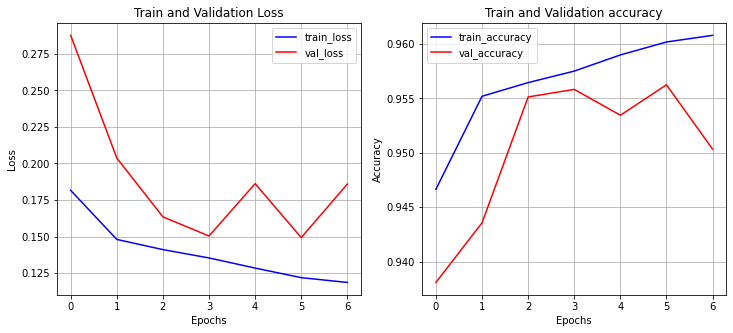

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=loss,metrics=['accuracy'])
history = model.fit(train_dataset,validation_data=val_dataset,epochs=5)

loss_his = history.history['loss']
val_loss_his = history.history['val_loss']

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(loss_his,color='blue',label='train_loss')
ax1.plot(val_loss_his,color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy_his = history.history['accuracy']
val_accuracy_his = history.history['val_accuracy']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(accuracy_his,color='blue',label='train_accuracy')
ax2.plot(val_accuracy_his,color='red',label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab/portfolio/weight_save/overlap_0604_2')

In [ ]:
model.get_default_graph().get_collection('hidden3')[0]
tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name='new_hidden4')

Grad CAM을 쓸까? 란 생각을 해봤지만,  
이번 프로젝트 프로세스에는 어울리지 않겠다란 생각에 구현하지 않았습니다  
근거는 아래와 같습니다  
* CAM으로 추출한 이미지와 최종 이미지와 다르다
* 모델 예측 결과가 이미지인데, 굳이 중간 과정을 시각화 할 필요는 없어보인다

### 모델 불러오기

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab/portfolio/weight_save/06031445_1')

In [ ]:
colormap = loadmat('/content/drive/MyDrive/Colab/portfolio/colormap/human_colormap.mat')['colormap']
colormap = colormap*100
colormap = colormap.astype(np.uint8)

def infer(model,image_tensor,x,y):
  predictions = model.predict(np.expand_dims((image_tensor), axis=0))
  predictions = tf.image.resize(images=predictions,size=(x,y))
  predictions = np.squeeze(predictions)
  predictions = np.argmax(predictions, axis=2)
  return predictions


def decode_segmentation_masks(mask,colormap,n_classes):
  r = np.zeros_like(mask).astype(np.uint8)
  g = np.zeros_like(mask).astype(np.uint8)
  b = np.zeros_like(mask).astype(np.uint8)
  for i in range(0,n_classes):
    idx = mask == i
    r[idx] = colormap[i,0]
    g[idx] = colormap[i,1]
    b[idx] = colormap[i,2]
  rgb = np.stack([r,g,b],axis=2)
  return rgb


def get_overlay(image,colored_mask,x,y):
  image = tf.image.resize(images=image,size=(x,y))
  image = tf.keras.preprocessing.image.array_to_img(image)
  image = np.array(image).astype(np.uint8)
  overlay = cv2.addWeighted(image,0.35, colored_mask,0.65,0)
  return overlay


def plot_samples_matplotlib(display_list,figsize,x,y):
  _,axes = plt.subplots(nrows=1,ncols=len(display_list),figsize=figsize)
  for i in range(len(display_list)):
    if display_list[i].shape[-1]==3:
      image = tf.image.resize(images=display_list[i],size=(x,y))
      axes[i].imshow(tf.keras.preprocessing.image.array_to_img(image))
    else:
      axes[i].imshow(display_list[i])
  plt.show()


def plot_predictions(images_list,masks_list,colormap,model):
  for image_file,mask in zip(images_list, masks_list):
    image_tensor = read_image(image_file)
    mask = cv2.imread(mask)
    msk_x,msk_y,_ = mask.shape
    prediction_mask = infer(image_tensor=image_tensor,model=model,x=msk_x,y=msk_y)
    prediction_colormap = decode_segmentation_masks(prediction_mask,colormap,20)
    overlay = get_overlay(image_tensor, prediction_colormap,msk_x,msk_y)
    plot_samples_matplotlib(display_list = [overlay,prediction_colormap,mask],figsize=(18,14),x=msk_x,y=msk_y)



In [ ]:
m=0
n=10

print('train')
plot_predictions(train_images[m:n],train_masks[m:n],colormap,model=model)
print('\n')
print('valid')
plot_predictions(val_images[m:n],val_masks[m:n],colormap,model=model)
print('\n')
print('test')
plot_predictions(test_images[m:n],test_masks[m:n],colormap,model=model)

## pred_overlap + spacing 마스크 합성

In [ ]:
C_dir = '/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C'

sp_train_images = sorted(glob(f'{C_dir}/train/images/*'))
sp_train_masks = sorted(glob(f'{C_dir}/train/masks/*'))

sp_val_images = sorted(glob(f'{C_dir}/valid/images/*'))
sp_val_masks = sorted(glob(f'{C_dir}/valid/masks/*'))

sp_test_images = sorted(glob(f'{C_dir}/test/images/*'))
sp_test_masks = sorted(glob(f'{C_dir}/test/masks/*'))

print(sp_train_images)
print(sp_train_masks)
print(sp_val_images)
print(sp_val_masks)
print(sp_test_images)
print(sp_test_masks)


print(len(sp_train_images))
print(len(sp_train_masks))
print(len(sp_val_images))
print(len(sp_val_masks))
print(len(sp_test_images))
print(len(sp_test_masks))

### spacing의 overlap 마스크 제작

In [ ]:
def deleteallfile(filepath):
  if os.path.exists(filepath):
    for file in os.scandir(filepath):
      os.remove(file.path)
    return 'remove all file'
  else:
    return 'directory not found'

delet_path = [f'{C_dir}/train/overlap_mask',
              f'{C_dir}/test/overlap_mask',
              f'{C_dir}/valid/overlap_mask']

for i in delet_path:
  deleteallfile(i)


In [ ]:
for image_path in sp_train_images:
  
  msk_x,msk_y,_ = cv2.imread(image_path).shape
  
  image_tensor = read_image(image_path)
  prediction = model.predict(np.expand_dims((image_tensor), axis=0))
  prediction = tf.image.resize(images=prediction,size=[msk_x,msk_y])

  prediction = np.squeeze(prediction)
  prediction = np.argmax(prediction, axis=2)

  # plt.imshow(prediction)
  # plt.show()
  
  cv2.imwrite(f'{C_dir}/train/overlap_mask{image_path[97:]}',prediction)


for image_path in sp_test_images:
  
  msk_x,msk_y,_ = cv2.imread(image_path).shape
  
  image_tensor = read_image(image_path)
  prediction = model.predict(np.expand_dims((image_tensor), axis=0))
  prediction = tf.image.resize(images=prediction,size=[msk_x,msk_y])

  prediction = np.squeeze(prediction)
  prediction = np.argmax(prediction, axis=2)

  # plt.imshow(prediction)
  # plt.show()
  
  # print(f'{C_dir}/test/overlap_mask{image_path[96:]}')
  cv2.imwrite(f'{C_dir}/test/overlap_mask{image_path[96:]}',prediction)


for image_path in sp_val_images:
  
  msk_x,msk_y,_ = cv2.imread(image_path).shape
  
  image_tensor = read_image(image_path)
  prediction = model.predict(np.expand_dims((image_tensor), axis=0))
  prediction = tf.image.resize(images=prediction,size=[msk_x,msk_y])

  prediction = np.squeeze(prediction)
  prediction = np.argmax(prediction, axis=2)

  # plt.imshow(prediction)
  # plt.show()
  
  # print(f'{spacing_dir}/valid/overlap_mask{image_path[97:]}')
  cv2.imwrite(f'{spacing_dir}/valid/overlap_mask{image_path[97:]}',prediction)

### spacing two_mask 제작

In [ ]:
delet_path = [f'{C_dir}/train/two_mask',
              f'{C_dir}/test/two_mask',
              f'{C_dir}/valid/two_mask']

for i in delet_path:
  deleteallfile(i)


In [ ]:
for overlap,origin_mask in zip(sorted(glob(f'{C_dir}/train/overlap_mask/*')),sorted(glob(f'{C_dir}/train/masks/*'))):
  overlap_mask_img = cv2.imread(overlap)
  origin_mask_img = cv2.imread(origin_mask)
  subtract_overlap = cv2.multiply(overlap_mask_img, origin_mask_img)
  
  origin_mask_img = cv2.cvtColor(origin_mask_img,cv2.COLOR_BGR2GRAY)
  origin_mask_img = cv2.threshold(origin_mask_img, 127, 4, cv2.THRESH_BINARY)[1]

  overlap_mask_img = cv2.imread(overlap)[:,:,0]
  origin_mask_img = cv2.imread(origin_mask)[:,:,0]

  subtract_overlap = subtract_overlap[:,:,0]

  plt.imshow(overlap_mask_img)
  plt.show()
  plt.imshow(origin_mask_img)
  plt.show()

  total_mask = cv2.add(cv2.subtract(overlap_mask_img,subtract_overlap),origin_mask_img)
  total_mask = np.where(total_mask<=4,total_mask,4)

  plt.imshow(total_mask)
  plt.show()

  print(total_mask.shape)
  print(np.unique(total_mask))

  # print(origin_mask)
  # print(overlap)
  # print(origin_mask[96:])
  # print(origin_mask[:91])
  # print(f'{origin_mask[:91]}two_mask{origin_mask[96:-4]}bmp')
  cv2.imwrite(f'{origin_mask[:91]}two_mask{origin_mask[96:]}.bmp',total_mask)


In [ ]:
for overlap,origin_mask in zip(sorted(glob(f'{C_dir}/test/overlap_mask/*')),sorted(glob(f'{C_dir}/test/masks/*'))):
  overlap_mask_img = cv2.imread(overlap)
  origin_mask_img = cv2.imread(origin_mask)
  subtract_overlap = cv2.multiply(overlap_mask_img, origin_mask_img)
  
  origin_mask_img = cv2.cvtColor(origin_mask_img,cv2.COLOR_BGR2GRAY)
  origin_mask_img = cv2.threshold(origin_mask_img, 127, 4, cv2.THRESH_BINARY)[1]

  overlap_mask_img = cv2.imread(overlap)[:,:,0]
  origin_mask_img = cv2.imread(origin_mask)[:,:,0]

  subtract_overlap = subtract_overlap[:,:,0]

  # plt.imshow(overlap_mask_img)
  # plt.show()
  # plt.imshow(origin_mask_img)
  # plt.show()

  total_mask = cv2.add(cv2.subtract(overlap_mask_img,subtract_overlap),origin_mask_img)
  total_mask = np.where(total_mask<=4,total_mask,4)

  # plt.imshow(total_mask)
  # plt.show()

  # print(total_mask.shape)
  # print(np.unique(total_mask))

  # print(origin_mask)
  # print(overlap)
  # print(origin_mask[95:])
  # print(origin_mask[:90])
  # print(f'{origin_mask[:90]}two_mask{origin_mask[95:-4]}bmp')
  cv2.imwrite(f'{origin_mask[:90]}two_mask{origin_mask[95:]}.bmp',total_mask)

In [ ]:
for overlap,origin_mask in zip(sorted(glob(f'{C_dir}/valid/overlap_mask/*')),sorted(glob(f'{C_dir}/valid/masks/*'))):
  overlap_mask_img = cv2.imread(overlap)
  origin_mask_img = cv2.imread(origin_mask)
  subtract_overlap = cv2.multiply(overlap_mask_img, origin_mask_img)
  
  origin_mask_img = cv2.cvtColor(origin_mask_img,cv2.COLOR_BGR2GRAY)
  origin_mask_img = cv2.threshold(origin_mask_img, 127, 4, cv2.THRESH_BINARY)[1]

  overlap_mask_img = cv2.imread(overlap)[:,:,0]
  origin_mask_img = cv2.imread(origin_mask)[:,:,0]

  subtract_overlap = subtract_overlap[:,:,0]

  # plt.imshow(overlap_mask_img)
  # plt.show()
  # plt.imshow(origin_mask_img)
  # plt.show()

  total_mask = cv2.add(cv2.subtract(overlap_mask_img,subtract_overlap),origin_mask_img)
  total_mask = np.where(total_mask<=4,total_mask,4)

  # plt.imshow(total_mask)
  # plt.show()

  # print(total_mask.shape)
  # print(np.unique(total_mask))

  # print(origin_mask)
  # print(overlap)
  # print(origin_mask[96:])
  # print(origin_mask[:91])
  # print(f'{origin_mask[:91]}two_mask{origin_mask[96:-4]}bmp')
  cv2.imwrite(f'{origin_mask[:91]}two_mask{origin_mask[96:]}.bmp',total_mask)


### 제작 마스크 확인

In [ ]:
train_twom = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train/two_mask/*'))
test_twom = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/test/two_mask/*'))
valid_twom = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/valid/two_mask/*'))


print(len(train_twom))
print(len(test_twom))
print(len(valid_twom))


for i in [train_twom, test_twom, valid_twom]:
  anjwl = cv2.imread(i[0])
  plt.imshow(anjwl[:,:,0])
  plt.show()
  print(anjwl.shape)
  print(np.unique(anjwl))
  print(train_twom[0])


## pred_overlap + spacing 학습 모델 구축

In [ ]:
DATA_DIR = '/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C'


train_images = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train/images/*'))
# train_images = [f'{i}.bmp' for i in train_images]
train_masks = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train/two_mask/*'))
# train_masks = [cv2.imread(i)[:,:,0] for i in train_masks]

val_images = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/valid/images/*'))
# val_images = [f'{i}.bmp' for i in val_images]
val_masks = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/valid/two_mask/*'))
# val_masks = [cv2.imread(i)[:,:,0] for i in val_masks]

test_images = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/test/images/*'))
# test_images = [f'{i}.bmp' for i in test_images]
test_masks = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/test/two_mask/*'))
# test_masks = [cv2.imread(i)[:,:,0] for i in test_masks]


print(len(train_images))
print(len(train_masks))
print(len(val_images))
print(len(val_masks))
print(len(test_images))
print(len(test_masks))

1212
1211
153
152
153
153


In [ ]:
# 이미지 확인란

for k in [train_masks,val_masks,test_masks]:
  for i in k:
    j = cv2.imread(i)[:,:,0]
    plt.imshow(j)
    plt.show()
    print(j.shape)
    cv2.imwrite('bmp_channel_t.bmp',j)
    break

anjwl = cv2.imread('bmp_channel_t.bmp')
print(anjwl.shape)
plt.imshow(anjwl)
plt.show()

# for k in [train_images, val_images,test_images]:
#   for idx,i in enumerate(k):
#     if idx <100:
#       continue
#     print(i)
#     j = cv2.imread(i)[:,:,0]
#     plt.imshow(j)
#     plt.show()
#     print(np.unique(j))
#     print(j.shape)
#     print(i)
#     break

### bmp 이미지 data_generator 및 deeplab v3 모델 재구축

In [ ]:
def read_image(image_path, mask=False):
  image = tf.io.read_file(image_path)
  if mask:
    image = tf.image.decode_bmp(image,channels=0)
    image.set_shape([None,None,1])
    image = tf.image.resize(images=image,size=[IMAGE_SIZE,IMAGE_SIZE])
  else:
    image = tf.image.decode_png(image,channels=3)
    image.set_shape([None,None,3])
    image = tf.image.resize(images=image,size=[IMAGE_SIZE,IMAGE_SIZE])
    image = image/127.5 -1
  return image


def load_data(image_list,mask_list):
  image = read_image(image_list)
  mask = read_image(mask_list,mask=True)
  return image,mask


def data_generator(image_list,mask_list):
  dataset = tf.data.Dataset.from_tensor_slices((image_list,mask_list))
  dataset = dataset.map(load_data,num_parallel_calls=tf.data.AUTOTUNE)
  dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
  return dataset

In [ ]:
sp_train_dataset = data_generator(train_images,train_masks)
sp_val_dataset = data_generator(val_images,val_masks)

print(sp_train_dataset)
print(sp_val_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>


In [ ]:
NUM_CLASSES = 5

def DeeplabV3(image_size,num_classes):
  model_input = keras.Input(shape=(image_size,image_size,3))
  resnet50 = keras.applications.ResNet50(weights='imagenet',include_top=False,input_tensor=model_input)

  x = resnet50.get_layer('conv4_block6_2_relu').output
  x = DilatedSpatialPyramidPooling(x)

  input_a = layers.UpSampling2D(size=(image_size//4//x.shape[1],image_size//4//x.shape[2]),interpolation='bilinear')(x)

  input_b = resnet50.get_layer('conv2_block3_2_relu').output
  input_b = convolution_block(input_b,num_filters=48,kernel_size=1)

  x = layers.Concatenate(axis=-1)([input_a,input_b])
  x = convolution_block(x)
  x = convolution_block(x)
  x = layers.UpSampling2D(size=(image_size // x.shape[1],
                                image_size // x.shape[2]),
                          interpolation='nearest')(x)  #nearest를 써보자 == 가장 고해상도 보간법이라 한다
  model_output = layers.Conv2D(num_classes,kernel_size=(1,1),padding='same')(x)
  return keras.Model(inputs=model_input, outputs=model_output)

model = DeeplabV3(image_size=IMAGE_SIZE,num_classes=NUM_CLASSES)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

### 모델 학습

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=loss,metrics=['accuracy'])
history = model.fit(sp_train_dataset,validation_data=sp_val_dataset,epochs=20)

Epoch 1/20
395/395 [==============================] - 158s 387ms/step - loss: 0.1790 - accuracy: 0.9495 - val_loss: 0.2530 - val_accuracy: 0.9458
Epoch 2/20
395/395 [==============================] - 151s 383ms/step - loss: 0.1503 - accuracy: 0.9548 - val_loss: 0.1727 - val_accuracy: 0.9523
Epoch 3/20
395/395 [==============================] - 151s 382ms/step - loss: 0.1418 - accuracy: 0.9563 - val_loss: 0.1874 - val_accuracy: 0.9445
Epoch 4/20
395/395 [==============================] - 151s 382ms/step - loss: 0.1346 - accuracy: 0.9577 - val_loss: 0.2091 - val_accuracy: 0.9417
Epoch 5/20
395/395 [==============================] - 151s 382ms/step - loss: 0.1278 - accuracy: 0.9590 - val_loss: 0.2247 - val_accuracy: 0.9514
Epoch 6/20
395/395 [==============================] - 151s 383ms/step - loss: 0.1231 - accuracy: 0.9599 - val_loss: 0.1824 - val_accuracy: 0.9533
Epoch 7/20
395/395 [==============================] - 151s 383ms/step - loss: 0.1183 - accuracy: 0.9608 - val_loss: 0.2347 -

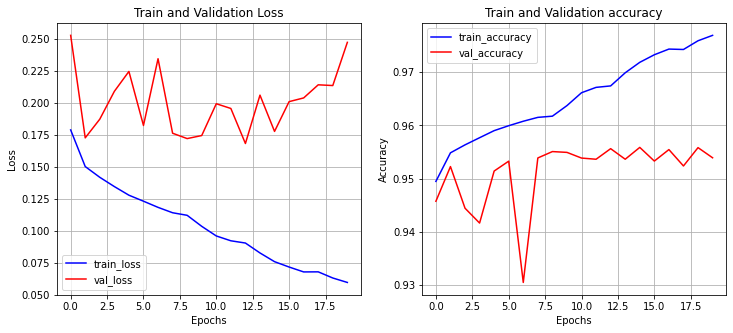

In [ ]:
loss_his = history.history['loss']
val_loss_his = history.history['val_loss']

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(loss_his,color='blue',label='train_loss')
ax1.plot(val_loss_his,color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy_his = history.history['accuracy']
val_accuracy_his = history.history['val_accuracy']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(accuracy_his,color='blue',label='train_accuracy')
ax2.plot(val_accuracy_his,color='red',label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
m=11
n=12

print('train')
plot_predictions(train_images[m:n],train_masks[m:n],colormap,model=model)
print('\n')
print('valid')
plot_predictions(val_images[m:n],val_masks[m:n],colormap,model=model)
print('\n')
print('test')
plot_predictions(test_images[m:n],test_masks[m:n],colormap,model=model)

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab/portfolio/weight_save/overlap+spacing_0604_1')

Epoch 1/20
302/302 [==============================] - 67s 206ms/step - loss: 0.0337 - accuracy: 0.9874 - val_loss: 0.0926 - val_accuracy: 0.9759
Epoch 2/20
302/302 [==============================] - 62s 204ms/step - loss: 0.0336 - accuracy: 0.9874 - val_loss: 0.0866 - val_accuracy: 0.9821
Epoch 3/20
302/302 [==============================] - 62s 204ms/step - loss: 0.0312 - accuracy: 0.9880 - val_loss: 0.0925 - val_accuracy: 0.9803
Epoch 4/20
302/302 [==============================] - 62s 204ms/step - loss: 0.0313 - accuracy: 0.9880 - val_loss: 0.0837 - val_accuracy: 0.9814
Epoch 5/20
302/302 [==============================] - 62s 204ms/step - loss: 0.0291 - accuracy: 0.9885 - val_loss: 0.0891 - val_accuracy: 0.9800
Epoch 6/20
302/302 [==============================] - 62s 204ms/step - loss: 0.0276 - accuracy: 0.9890 - val_loss: 0.0963 - val_accuracy: 0.9805
Epoch 7/20
302/302 [==============================] - 62s 204ms/step - loss: 0.0273 - accuracy: 0.9890 - val_loss: 0.1009 - val_ac

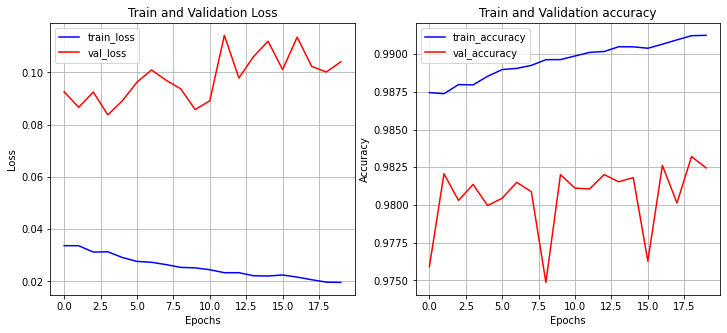

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=loss,metrics=['accuracy'])
history = model.fit(sp_train_dataset,validation_data=sp_val_dataset,epochs=20)


loss_his = history.history['loss']
val_loss_his = history.history['val_loss']

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(loss_his,color='blue',label='train_loss')
ax1.plot(val_loss_his,color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy_his = history.history['accuracy']
val_accuracy_his = history.history['val_accuracy']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(accuracy_his,color='blue',label='train_accuracy')
ax2.plot(val_accuracy_his,color='red',label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
m=115
n=120

print('train')
plot_predictions(train_images[m:n],train_masks[m:n],colormap,model=model)
print('\n')
print('valid')
plot_predictions(val_images[m:n],val_masks[m:n],colormap,model=model)
print('\n')
print('test')
plot_predictions(test_images[m:n],test_masks[m:n],colormap,model=model)

In [ ]:
m=0
n=2

over_train_images = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/train/image/*'))
over_train_masks = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/train/mask/*'))

over_val_images = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/valid/image/*'))
over_val_masks = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/valid/mask/*'))

over_test_images = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/test/image/*'))
over_test_masks = sorted(glob('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/overlap/test/mask/*'))


print('train')
plot_predictions(over_train_images[m:n],over_train_masks[m:n],colormap,model=model)
print('\n')
print('valid')
plot_predictions(over_val_images[m:n],over_val_masks[m:n],colormap,model=model)
print('\n')
print('test')
plot_predictions(over_test_images[m:n],over_test_masks[m:n],colormap,model=model)

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab/portfolio/weight_save/overlap_spacing_220604')

## spacing 학습 모델 구축

### n 데이터 제작

In [ ]:

DATA_DIR = '/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C'


train_images = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/images/*'))
train_masks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/masks/*'))

val_images = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/images/*'))
val_masks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/masks/*'))

test_images = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/images/*'))
test_masks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/masks/*'))

C_images = [i for i in train_images if not 'augmented' in i] + [i for i in val_images if not 'augmented' in i] + [i for i in test_images if not 'augmented' in i]
C_masks = [i for i in train_masks if not 'augmented' in i] + [i for i in val_masks if not 'augmented' in i] + [i for i in test_masks if not 'augmented' in i]


print(len(train_images))
print(len(train_masks))
print(len(val_images))
print(len(val_masks))
print(len(test_images))
print(len(test_masks))

print(len(C_images))
print(len(C_masks))

1211
1211
152
152
153
153
1516
1516


In [ ]:
def deleteallfile(filepath):
  if os.path.exists(filepath):
    for file in os.scandir(filepath):
      os.remove(file.path)
    return 'remove all file'
  else:
    return 'directory not found'

delet_path = ['/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train',
              '/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/test',
              '/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/valid']

deleteallfile('/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/augmented')
for i in delet_path:
  deleteallfile(i+'/image')
  deleteallfile(i+'/nimage')
  deleteallfile(i+'/mask')
  deleteallfile(i+'/nmask')


In [ ]:
c_train = 0
c_test = 0
c_valid = 0


for i in range(len(C_images)):
  overlap = cv2.imread(C_masks[i])

  all_m = cv2.cvtColor(overlap,cv2.COLOR_BGR2GRAY)
  all_m = cv2.threshold(all_m, 127, 1, cv2.THRESH_BINARY)[1]

  # plt.imshow(all_m)
  # plt.show()
  print(np.unique(all_m))
  print(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train/nimage{C_images[i][91:]}')
  print(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train/nimage{C_images[i][97:]}')

  if 'train' in C_images[i]:
    if len(np.unique(all_m)) == 1:
      cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train/nimage{C_images[i][97:]}',cv2.imread(C_images[i]))
  #     cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train/nmask{C_images[i][97:]}',all_m)
  #     print('train nm')
  #     c_train+=1
  #     continue
  #   cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train/image{C_images[i][97:]}',cv2.imread(C_images[i]))
  #   cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/train/mask{C_images[i][97:]}',all_m)
  #   cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/augmented{C_images[i][97:]}',all_m)
  #   plt.imshow(all_m)
  #   plt.show()
  #   c_train+=1
  # elif 'test' in C_images[i]:
  #   if len(np.unique(all_m)) == 1:
  #     cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/test/nimage{C_images[i][96:]}',cv2.imread(C_images[i]))
  #     cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/test/nmask{C_images[i][96:]}',all_m)
  #     print('test nm')
  #     c_test+=1
  #     continue
  #   cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/test/image{C_images[i][96:]}',cv2.imread(C_images[i]))
  #   cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/test/mask{C_images[i][96:]}',all_m)
  #   cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/augmented{C_images[i][96:]}',all_m)
  #   plt.imshow(all_m)
  #   plt.show()
  #   c_test+=1
  # elif 'valid' in C_images[i]:
  #   if len(np.unique(all_m)) == 1:
  #     cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/valid/nimage{C_images[i][97:]}',cv2.imread(C_images[i]))
  #     cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/valid/nmask{C_images[i][97:]}',all_m)
  #     print('valid nm')
  #     c_valid+=1
  #     continue
  #   cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/valid/image{C_images[i][97:]}',cv2.imread(C_images[i]))
  #   cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/valid/mask{C_images[i][97:]}',all_m)
  #   cv2.imwrite(f'/content/drive/MyDrive/Colab/aiffel_thon/data/accida_segmentation_dataset_v1/C/augmented{C_images[i][97:]}',all_m)
  #   plt.imshow(all_m)
  #   plt.show()
  #   c_valid+=1


print('done')

### dilate_mask
출처: https://jvvp.tistory.com/1081

In [ ]:
k = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

dilation = cv2.dilate(cv2.imread(C_masks[0]),k)

for i in range(20):
  dilation = cv2.dilate(dilation,k)
plt.imshow(dilation)
plt.show()

In [ ]:
c_train = 0
c_test = 0
c_valid = 0


for i in range(len(C_images)):
  overlap = cv2.imread(C_masks[i])

  all_m = cv2.cvtColor(overlap,cv2.COLOR_BGR2GRAY)
  all_m = cv2.threshold(all_m, 127, 1, cv2.THRESH_BINARY)[1]

  k = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
  all_m = cv2.dilate(all_m,k)
  for _ in range(20):
    all_m = cv2.dilate(all_m,k)

  # plt.imshow(all_m)
  # plt.show()
  # print(np.unique(all_m))
  # print(C_images[i][89:])
  # print(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/image{C_images[i][89:]}')

  if 'train' in C_images[i]:
    if len(np.unique(all_m)) == 1:
      # cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/nimage{C_images[i][89:]}',cv2.imread(C_images[i]))
      # cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/nmask{C_images[i][89:]}',all_m)
      # print('train nm')
      # c_train+=1
      continue
    cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/dimage{C_images[i][89:]}',cv2.imread(C_images[i]))
    cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/dmask{C_images[i][89:]}',all_m)
    # cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/augmented{C_images[i][89:]}',all_m)
    # plt.imshow(all_m)
    # plt.show()
    # c_train+=1
  elif 'test' in C_images[i]:
    if len(np.unique(all_m)) == 1:
      # cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/nimage{C_images[i][88:]}',cv2.imread(C_images[i]))
      # cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/nmask{C_images[i][88:]}',all_m)
      # print('test nm')
      # c_test+=1
      continue
    cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/dimage{C_images[i][88:]}',cv2.imread(C_images[i]))
    cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/dmask{C_images[i][88:]}',all_m)
    # cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/augmented{C_images[i][88:]}',all_m)
    # plt.imshow(all_m)
    # plt.show()
    # c_test+=1
  elif 'valid' in C_images[i]:
    if len(np.unique(all_m)) == 1:
      # cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/nimage{C_images[i][89:]}',cv2.imread(C_images[i]))
      # cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/nmask{C_images[i][89:]}',all_m)
      # print('valid nm')
      # c_valid+=1
      continue
    cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/dimage{C_images[i][89:]}',cv2.imread(C_images[i]))
    cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/dmask{C_images[i][89:]}',all_m)
    # cv2.imwrite(f'/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/augmented{C_images[i][89:]}',all_m)
    # plt.imshow(all_m)
    # plt.show()
    # c_valid+=1


print('done')

done


### 모델 구축 및 학습

In [ ]:
BATCH_SIZE = 4
NUM_CLASSES = 2

def read_image(image_path, mask=False):
  image = tf.io.read_file(image_path)
  if mask:
    image = tf.image.decode_png(image,channels=0)
    image.set_shape([None,None,1])
    image = tf.image.resize(images=image,size=[IMAGE_SIZE,IMAGE_SIZE])
  else:
    image = tf.image.decode_png(image,channels=3)
    image.set_shape([None,None,3])
    image = tf.image.resize(images=image,size=[IMAGE_SIZE,IMAGE_SIZE])
    image = image/127.5 -1
  return image


def load_data(image_list,mask_list):
  image = read_image(image_list)
  mask = read_image(mask_list,mask=True)
  return image,mask


def data_generator(image_list,mask_list):
  dataset = tf.data.Dataset.from_tensor_slices((image_list,mask_list))
  dataset = dataset.map(load_data,num_parallel_calls=tf.data.AUTOTUNE)
  dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
  return dataset

In [ ]:
train_images = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/dimage/*'))
train_masks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/dmask/*'))
val_images = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/dimage/*'))
val_masks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/dmask/*'))
test_images = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/dimage/*'))
test_masks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/dmask/*'))


sp_train_dataset = data_generator(train_images,train_masks)
sp_val_dataset = data_generator(val_images,val_masks)

print(sp_train_dataset)
print(sp_val_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>


In [ ]:
image_size,num_classes = IMAGE_SIZE,2

model_input = keras.Input(shape=(image_size,image_size,3))
resnet50 = keras.applications.ResNet50(weights='imagenet',include_top=False,input_tensor=model_input)

x = resnet50.get_layer('conv4_block6_2_relu').output
x = DilatedSpatialPyramidPooling(x)
  
input_a = layers.UpSampling2D(size=(image_size//4//x.shape[1],image_size//4//x.shape[2]),interpolation='bilinear')(x)

input_b = resnet50.get_layer('conv2_block3_2_relu').output
input_b = convolution_block(input_b,num_filters=48,kernel_size=1)

input_c = resnet50.get_layer('conv2_block2_2_relu').output
input_c = convolution_block(input_b,num_filters=48,kernel_size=1)
input_d = resnet50.get_layer('conv2_block1_1_relu').output
input_d = convolution_block(input_b,num_filters=48,kernel_size=3)
input_e = resnet50.get_layer('conv1_relu').output
input_e = convolution_block(input_b,num_filters=48,kernel_size=3)


# x = layers.Concatenate(axis=-1)([input_a,input_b,input_c,input_d])
x = layers.Concatenate(axis=-1)([input_a,input_b,input_d])
x = convolution_block(x)
x = convolution_block(x)
x = layers.UpSampling2D(size=(image_size // x.shape[1],
                              image_size // x.shape[2]),
                        interpolation='nearest')(x)
model_output = layers.Conv2D(num_classes,kernel_size=(1,1),padding='same')(x)
model = keras.Model(inputs=model_input, outputs=model_output)


model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_12[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Epoch 1/5
165/165 [==============================] - 71s 397ms/step - loss: 0.1356 - accuracy: 0.9571 - val_loss: 0.1363 - val_accuracy: 0.9699
Epoch 2/5
165/165 [==============================] - 64s 388ms/step - loss: 0.0928 - accuracy: 0.9694 - val_loss: 0.1399 - val_accuracy: 0.9699
Epoch 3/5
165/165 [==============================] - 64s 389ms/step - loss: 0.0840 - accuracy: 0.9699 - val_loss: 0.1171 - val_accuracy: 0.9675
Epoch 4/5
165/165 [==============================] - 64s 388ms/step - loss: 0.0792 - accuracy: 0.9703 - val_loss: 0.1055 - val_accuracy: 0.9702
Epoch 5/5
165/165 [==============================] - 64s 389ms/step - loss: 0.0750 - accuracy: 0.9709 - val_loss: 0.0891 - val_accuracy: 0.9702


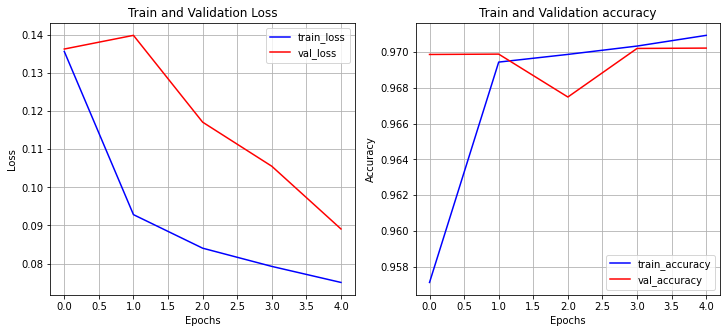

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=loss,metrics=['accuracy'])
history = model.fit(sp_train_dataset,validation_data=sp_val_dataset,epochs=5)

loss_his = history.history['loss']
val_loss_his = history.history['val_loss']

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(loss_his,color='blue',label='train_loss')
ax1.plot(val_loss_his,color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy_his = history.history['accuracy']
val_accuracy_his = history.history['val_accuracy']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(accuracy_his,color='blue',label='train_accuracy')
ax2.plot(val_accuracy_his,color='red',label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
m=10
n=20

test_dmasks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/dmask/*'))

print('train')
plot_predictions(train_images[m:n],train_masks[m:n],colormap,model=model)
print('\n')
print('valid')
plot_predictions(val_images[m:n],val_masks[m:n],colormap,model=model)
print('\n')
print('test')
plot_predictions(test_images[m:n],test_masks[m:n],colormap,model=model)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='pre_model.png')

Output hidden; open in https://colab.research.google.com to view.

## pred(overlap + sapcing) - pred(overlap)

### model_ovsp 구축 및 학습

In [ ]:
def read_image(image_path, mask=False):
  image = tf.io.read_file(image_path)
  if mask:
    image = tf.image.decode_bmp(image,channels=1)
    image.set_shape([None,None,1])
    image = tf.image.resize(images=image,size=[IMAGE_SIZE,IMAGE_SIZE])
  else:
    image = tf.image.decode_png(image,channels=3)
    image.set_shape([None,None,3])
    image = tf.image.resize(images=image,size=[IMAGE_SIZE,IMAGE_SIZE])
    image = image/127.5 -1
  return image


def load_data(image_list,mask_list):
  image = read_image(image_list)
  mask = read_image(mask_list,mask=True)
  return image,mask


def data_generator(image_list,mask_list):
  dataset = tf.data.Dataset.from_tensor_slices((image_list,mask_list))
  dataset = dataset.map(load_data,num_parallel_calls=tf.data.AUTOTUNE)
  dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
  return dataset

In [ ]:
NUM_CLASSES = 4

def DeeplabV3(image_size,num_classes):
  model_input = keras.Input(shape=(image_size,image_size,3))
  resnet50 = keras.applications.ResNet50(weights='imagenet',include_top=False,input_tensor=model_input)

  x = resnet50.get_layer('conv4_block6_2_relu').output
  x = DilatedSpatialPyramidPooling(x)

  input_a = layers.UpSampling2D(size=(image_size//4//x.shape[1],image_size//4//x.shape[2]),interpolation='bilinear')(x)

  input_b = resnet50.get_layer('conv2_block3_2_relu').output
  input_b = convolution_block(input_b,num_filters=48,kernel_size=1)

  x = layers.Concatenate(axis=-1)([input_a,input_b])
  x = convolution_block(x)
  x = convolution_block(x)
  x = layers.UpSampling2D(size=(image_size // x.shape[1],
                                image_size // x.shape[2]),
                          interpolation='nearest')(x)  #nearest를 써보자 == 가장 고해상도 보간법이라 한다
  model_output = layers.Conv2D(num_classes,kernel_size=(1,1),padding='same')(x)
  return keras.Model(inputs=model_input, outputs=model_output)


model_ovsp = DeeplabV3(image_size=IMAGE_SIZE,num_classes=NUM_CLASSES)
model_ovsp.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
train_images = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/images/*'))
# train_images = [f'{i}.bmp' for i in train_images]
train_masks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/train/two_mask/*'))
# train_masks = [cv2.imread(i)[:,:,0] for i in train_masks]

val_images = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/images/*'))
# val_images = [f'{i}.bmp' for i in val_images]
val_masks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/valid/two_mask/*'))
# val_masks = [cv2.imread(i)[:,:,0] for i in val_masks]

test_images = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/images/*'))
# test_images = [f'{i}.bmp' for i in test_images]
test_masks = sorted(glob('/content/drive/MyDrive/Colab/portfolio/data/accida_segmentation_dataset_v1/C/test/two_mask/*'))
# test_masks = [cv2.imread(i)[:,:,0] for i in test_masks]


print(len(train_images))
print(len(train_masks))
print(len(val_images))
print(len(val_masks))
print(len(test_images))
print(len(test_masks))

# for i,j in zip(train_images,train_masks):
#   if not i[97:]==j[99:-4]:
#     print(i[97:]==j[99:-4])
#     print(i[97:])
#     print(j[99:-4])




sp_train_dataset = data_generator(train_images[1:],train_masks)
sp_val_dataset = data_generator(val_images[1:],val_masks)

print(sp_train_dataset)
print(sp_val_dataset)


loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_ovsp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=loss,metrics=['accuracy'])
history = model_ovsp.fit(sp_train_dataset,validation_data=sp_val_dataset,epochs=20)


loss_his = history.history['loss']
val_loss_his = history.history['val_loss']

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(loss_his,color='blue',label='train_loss')
ax1.plot(val_loss_his,color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy_his = history.history['accuracy']
val_accuracy_his = history.history['val_accuracy']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(accuracy_his,color='blue',label='train_accuracy')
ax2.plot(val_accuracy_his,color='red',label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()


m=115
n=120

print('train')
plot_predictions(train_images[m:n],train_masks[m:n],colormap,model=model)
print('\n')
print('valid')
plot_predictions(val_images[m:n],val_masks[m:n],colormap,model=model)
print('\n')
print('test')
plot_predictions(test_images[m:n],test_masks[m:n],colormap,model=model)

In [ ]:
for image_path in train_images:
  msk_x,msk_y,_ = cv2.imread(image_path).shape
  
  image_tensor = read_image(image_path)
  prediction = model.predict(np.expand_dims((image_tensor), axis=0))
  prediction = tf.image.resize(images=prediction,size=[msk_x,msk_y])

  prediction = np.squeeze(prediction)
  prediction = np.argmax(prediction, axis=2)

  plt.imshow(prediction)
  plt.show()
  
  # print(f'{spacing_dir}/train/overlap_mask{image_path[97:]}')